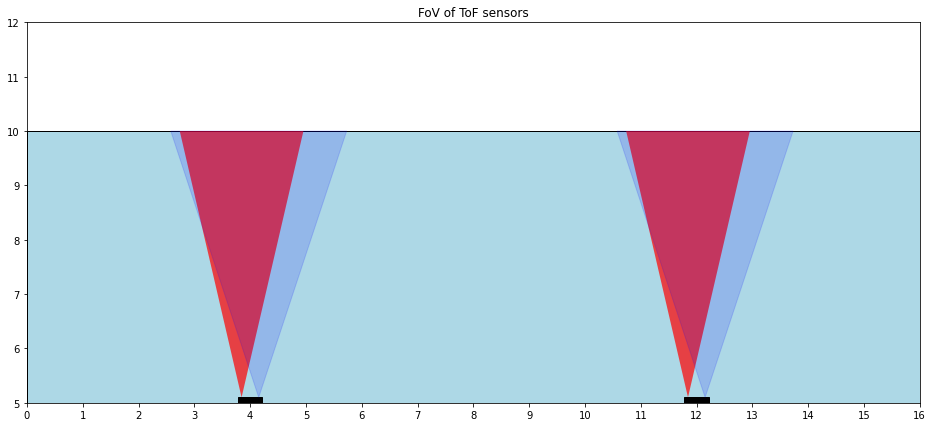

In [270]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Ellipse
import numpy as np

size = 10
L = 160 
D = 200
d = 100
R = D/2
r = d/2

y_offset = r/size

def FoV_ToF(x_position, y_position, tri_height, frame_width=0.6, frame_height=0.3):
    rect_width = 4.4/size
    rect_height = 0.1
    rect_x = x_position - rect_width / 2
    rect_y = y_position + y_offset# y 좌표 업데이트
    offset = 0.665/size

    angle_1 = 25
    angle_2 = 35

    tri_base_1 = 2 * tri_height * np.tan(np.deg2rad(angle_1 / 2)) / size
    tri_base_2 = 2 * tri_height * np.tan(np.deg2rad(angle_2 / 2)) / size

    # 빨간색 삼각형의 꼭짓점
    red_triangle_vertices = [
        (rect_x + offset, rect_y + rect_height),
        (rect_x + offset + tri_base_1 / 2, rect_y + tri_height / size),
        (rect_x + offset - tri_base_1 / 2, rect_y + tri_height / size)
    ]
    
    # 파란색 삼각형의 꼭짓점
    blue_triangle_vertices = [
        (rect_x + rect_width - offset, rect_y + rect_height),
        (rect_x + rect_width - offset + tri_base_2 / 2, rect_y + tri_height / size),
        (rect_x + rect_width - offset - tri_base_2 / 2, rect_y + tri_height / size)
    ]

    plt.gca().add_patch(patches.Rectangle((rect_x, rect_y), rect_width, rect_height, edgecolor='black', facecolor='black'))
    plt.gca().add_patch(patches.Polygon(red_triangle_vertices, closed=True, color='red', alpha=0.7, linewidth=0))
    plt.gca().add_patch(patches.Polygon(blue_triangle_vertices, closed=True, color='blue', alpha=0.15))
    
def plot_quartic_function(params, Rec_h, Rec_v):
    a, p, q, k = params
    x = np.linspace(0, L/size, 1000)
    y = a / 4 * (x - p) ** 4 - a * k * k / 2 * (x - p) ** 2 + q
    plt.plot(x, y, color='black')
    plt.xlim(0, Rec_h)
    plt.ylim(0, Rec_v + 2)
    plt.xticks(np.arange(0, 17, 1))
    plt.yticks(np.arange(0, 6, 1))

def plot_quadratic_function(a, p, q):
    x = np.linspace(0, 16, 1000) # x 범위 설정
    y = a * (x - p)**2 + q
    y = np.clip(y, None, 5) # y값이 5를 넘지 않게 자르기
    plt.plot(x, y, color='black')

def plot_arc(center_x, center_y, s1, start_angle=0, end_angle=180, color='red'):
    arc = patches.Arc([center_x, center_y], s1*2, s1*2, theta1=start_angle, theta2=end_angle, color=color)
    plt.gca().add_patch(arc)
    
def plot_ellipse(x_center, y_center, width, height, angle=0, color='#FFDEAD'):    
    ellipse = Ellipse((x_center, y_center), width, height, angle=angle, color=color)
    plt.gca().add_patch(ellipse)
    
def plot_graph(n):
    

    Rec_h = L/size
    Rec_v = (D-d)/2/size
    
    plt.figure(figsize=(Rec_h, Rec_v+2))
    
    # 직사각형 배경
    plt.gca().add_patch(patches.Rectangle((0, r/size), Rec_h, Rec_v, edgecolor='black', facecolor='lightblue'))
        
    # ToF with FoV 그리기
    total_width = L/size
    offset = total_width/n/2
    distance_between_shapes = total_width / n

    for i in range(n):
        position_x = offset + i * distance_between_shapes
        FoV_ToF(position_x, 0, Rec_v*size)        

#     # 4차 함수
#     plot_quartic_function(params, Rec_h, Rec_v)

    
    # Plot 설정
    plt.xlim(0, Rec_h)
    plt.ylim(r/size, R/size+2)

    plt.xticks(np.arange(0, Rec_h+1, 1))
    plt.yticks(np.arange(r/size, R/size+3, 1))

    #plt.grid(True, which='both', linestyle='-', linewidth=0.5)

    plt.title('FoV of ToF sensors')

plot_graph(2) # 4개의 도형을 배치
#plot_ellipse(8, 3.5, 1.2, 1.6)


In [279]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Ellipse
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

size = 10
L = 160 
D = 200
d = 100
R = D/2
r = d/2

y_offset = r/size

class FoV_ToF:
    def __init__(self, x_position, y_position, tri_height, frame_width=0.6, frame_height=0.3):
        self.x_position = x_position
        self.y_position = y_position + y_offset
        self.tri_height = tri_height
        self.rect_width = 4.4/size
        self.rect_height = 0.1
        self.rect_x = x_position - self.rect_width / 2
        self.rect_y = y_position + y_offset
        self.offset = 0.665/size
        self.angle_1 = 25
        self.angle_2 = 35

        self.tri_base_1 = 2 * tri_height * np.tan(np.deg2rad(self.angle_1 / 2)) / size
        self.tri_base_2 = 2 * tri_height * np.tan(np.deg2rad(self.angle_2 / 2)) / size

        # 빨간색 삼각형의 꼭짓점
        self.red_triangle_vertices = [
            (self.rect_x + self.offset, self.rect_y + self.rect_height),
            (self.rect_x + self.offset + self.tri_base_1 / 2, self.rect_y + self.tri_height / size),
            (self.rect_x + self.offset - self.tri_base_1 / 2, self.rect_y + self.tri_height / size)
        ]
        
        # 파란색 삼각형의 꼭짓점
        self.blue_triangle_vertices = [
            (self.rect_x + self.rect_width - self.offset, self.rect_y + self.rect_height),
            (self.rect_x + self.rect_width - self.offset + self.tri_base_2 / 2, self.rect_y + self.tri_height / size),
            (self.rect_x + self.rect_width - self.offset - self.tri_base_2 / 2, self.rect_y + self.tri_height / size)
        ]
        
        #호 변수
        self.arc_center = self.red_triangle_vertices[0] 
        self.arc_radius = 0
        self.arc_diameter = self.arc_radius * 2
        self.arc_theta1 = 90 - self.angle_1/2  # 시작 각도
        self.arc_theta2 = 90 + self.angle_1/2 # 끝 각도
    def draw(self):
        # 센서 칩
        plt.gca().add_patch(patches.Rectangle((self.rect_x, self.rect_y), self.rect_width, self.rect_height, edgecolor='black', facecolor='black'))
        # Collector
        plt.gca().add_patch(patches.Polygon(self.red_triangle_vertices, closed=True, color='red', alpha=0.7, linewidth=0))
        # Emitter
        plt.gca().add_patch(patches.Polygon(self.blue_triangle_vertices, closed=True, color='blue', alpha=0.15))
    def draw_arc(self):
        # 여기에 호를 그리는 코드 추가 가능
        plt.gca().add_patch(patches.Arc(self.arc_center,self.arc_diameter, self.arc_diameter, theta1=self.arc_theta1, theta2=self.arc_theta2,linewidth=2))
    def update_arc(self, radius):
        self.arc_radius = radius/10
        self.arc_diameter = self.arc_radius * 2
        self.draw_arc() # 변경 사항을 반영하여 다시 그립니다.


def plot_quadratic_function(a, p, q):
    x = np.linspace(0, 16, 1000) # x 범위 설정
    y = a * (x - p)**2 + 10-q
    y = np.clip(y, None, 10) # y값이 5를 넘지 않게 자르기
    plt.plot(x, y, color='black')
        
def plot_graph(n):
    
    Rec_h = L/size
    Rec_v = (D-d)/2/size
    figure_size = 0.9
    plt.figure(figsize=(Rec_h*figure_size, (Rec_v+1)*figure_size))
    
    # 직사각형 배경
    plt.gca().add_patch(patches.Rectangle((0, r/size), Rec_h, Rec_v, edgecolor='black', facecolor='lightblue'))
        
    # ToF with FoV 그리기
    total_width = L/size
    offset = total_width/n/2
    distance_between_shapes = total_width / n

    
    sensors = [] # 센서 인스턴스를 저장할 리스트
    for i in range(n):
        position_x = offset + i * distance_between_shapes
        sensor = FoV_ToF(position_x, 0, Rec_v*size)
        sensor.draw()
        sensors.append(sensor) # 센서 인스턴스를 리스트에 추가

    # Plot 설정
    plt.xlim(0, Rec_h)
    plt.ylim(r/size, R/size+1)

    plt.xticks(np.arange(0, Rec_h+1, 1))
    plt.yticks(np.arange(r/size, R/size+2, 1))

    #plt.grid(True, which='both', linestyle='-', linewidth=0.5)

    plt.title('FoV of ToF sensors')
    
    return sensors # 센서 인스턴스 리스트 반환

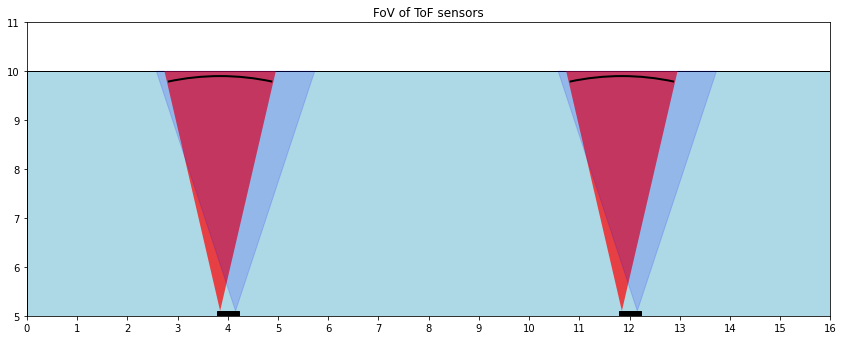

In [284]:
sensors  = plot_graph(2) # n개의 도형을 배치
sensors[0].update_arc(48)
sensors[1].update_arc(48)


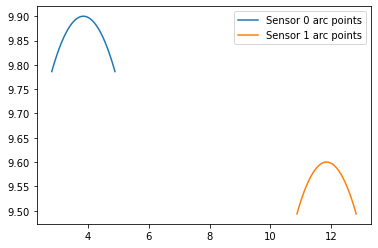

In [281]:
def cartesian_coordinates(sensor, theta):
    x_center, y_center = sensor.arc_center
    radius = sensor.arc_radius

    x = x_center + radius * np.cos(np.deg2rad(theta))
    y = y_center + radius * np.sin(np.deg2rad(theta))
    return x, y

theta_range = np.linspace(90 - 12.5, 90 + 12.5, 100)

# 센서 0에 대한 좌표 계산
x0, y0 = cartesian_coordinates(sensors[0], theta_range)
plt.plot(x0, y0, label='Sensor 0 arc points')

# 센서 1에 대한 좌표 계산
x1, y1 = cartesian_coordinates(sensors[1], theta_range)
plt.plot(x1, y1, label='Sensor 1 arc points')

plt.legend()
plt.show()


In [282]:
from sympy import symbols, Eq, solve

p=4
q=5
a = symbols('a')
eq1 = Eq(y0, a * (x0 - p)**2 + q)
eq2 = Eq(y1, a * (x1 - p)**2 + q)

solution = solve((eq1, eq2), (a,))
a_value = solution[a]

def quadratic_function(x):
    return a_value * (x - p)**2 + q


SympifyError: SympifyError: array([9.78622083, 9.79075419, 9.79519643, 9.79954747, 9.80380722,
       9.80797559, 9.81205252, 9.81603791, 9.81993169, 9.82373378,
       9.82744412, 9.83106262, 9.83458923, 9.83802386, 9.84136646,
       9.84461695, 9.84777528, 9.85084139, 9.8538152 , 9.85669668,
       9.85948576, 9.86218238, 9.86478649, 9.86729805, 9.86971701,
       9.87204331, 9.87427692, 9.87641778, 9.87846586, 9.88042112,
       9.88228352, 9.88405302, 9.88572959, 9.8873132 , 9.88880381,
       9.89020141, 9.89150595, 9.89271741, 9.89383578, 9.89486102,
       9.89579313, 9.89663207, 9.89737784, 9.89803042, 9.8985898 ,
       9.89905597, 9.89942891, 9.89970863, 9.8998951 , 9.89998834,
       9.89998834, 9.8998951 , 9.89970863, 9.89942891, 9.89905597,
       9.8985898 , 9.89803042, 9.89737784, 9.89663207, 9.89579313,
       9.89486102, 9.89383578, 9.89271741, 9.89150595, 9.89020141,
       9.88880381, 9.8873132 , 9.88572959, 9.88405302, 9.88228352,
       9.88042112, 9.87846586, 9.87641778, 9.87427692, 9.87204331,
       9.86971701, 9.86729805, 9.86478649, 9.86218238, 9.85948576,
       9.85669668, 9.8538152 , 9.85084139, 9.84777528, 9.84461695,
       9.84136646, 9.83802386, 9.83458923, 9.83106262, 9.82744412,
       9.82373378, 9.81993169, 9.81603791, 9.81205252, 9.80797559,
       9.80380722, 9.79954747, 9.79519643, 9.79075419, 9.78622083])